In [1]:
import pandas as pd
import glob
import os
from pathlib import Path
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Natural Proteins

In [2]:
sampdir = Path("/data/lux70/plaid/artifacts/natural")
nat_df_dict = {}
for length in os.listdir(sampdir):
    nat_df_dict[length] = pd.read_csv(sampdir / str(length) / "designability.csv")

nat_df = pd.concat(list(nat_df_dict.values()))

print(nat_df.designable.sum() / len(nat_df))
nat_df.describe() 

0.999526066350711


,Unnamed: 0,plddt,ccrmsd,scrmsd,cctm,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
count,4220.000000,4220.000000,4.220000e+03,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000
mean,579.782227,78.889005,1.349789e-02,4.432093,0.999664,0.783604,9.865747,14172.426968,0.084651,38.079327,6.959271,-0.184684,-1.136821
std,366.470662,11.001894,1.473318e-01,6.171212,0.005765,0.204115,5.027404,10958.734299,0.037552,16.755585,1.976096,0.460696,5.730593
min,0.000000,22.856881,6.584438e-16,0.251305,0.721970,0.134410,1.240745,1422.496100,0.000000,-18.421212,4.050028,-2.109524,-34.655971
25%,263.000000,74.349964,3.760774e-15,0.910211,1.000000,0.676657,5.529786,5769.348450,0.057692,27.607228,5.179121,-0.452056,-3.963249
50%,538.000000,81.624059,5.954133e-15,1.826484,1.000000,0.861050,9.303823,11231.416350,0.082278,36.346528,6.474382,-0.204668,-0.588467
75%,890.000000,86.262404,4.673924e-14,5.366524,1.000000,0.947477,13.725045,18617.782925,0.106802,46.402206,8.860567,0.044637,2.062042
max,1314.000000,96.962145,6.595819e+00,116.396061,1.000000,0.995960,35.084185,57047.234000,0.269231,184.480000,11.999968,1.571429,27.420586


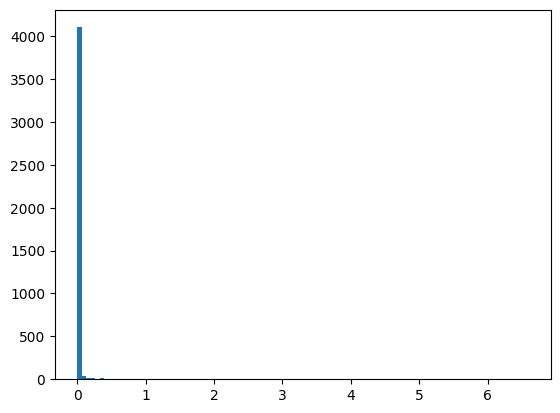

In [3]:
_ = plt.hist(nat_df.ccrmsd, bins=100)

In [4]:
nat_df.columns

Index(['Unnamed: 0', 'pdb_paths', 'sequences', 'inverse_generated_pdb_paths',
       'phantom_generated_pdb_paths', 'plddt', 'ccrmsd', 'scrmsd', 'cctm',
       'sctm', 'designable', 'perplexity', 'molecular_weight', 'aromaticity',
       'instability_index', 'isoelectric_point', 'gravy', 'charge_at_pH'],
      dtype='object')

In [5]:
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import minmax_scale

# sanity check:

df = nat_df.copy()

sequence_properties = ['molecular_weight', 'aromaticity', 'instability_index', 'isoelectric_point', 'gravy', 'charge_at_pH']

wasserstein_distances = {}

for column in sequence_properties:
    # filter out NaN rows for this column
    valid = df.loc[df[column].notna(), column]
    valid_ref = nat_df.loc[nat_df[column].notna(), column]

    # min/max norm the validated rows.
    try:
        normed = minmax_scale(valid)
        normed_ref = minmax_scale(valid_ref)
        # compute wasserstein
        wasserstein_distances[f"{column}_wd"] = wasserstein_distance(normed, normed_ref)
    except ValueError:
        wasserstein_distances[f"{column}_wd"] = float("inf")

total_wd = sum(wasserstein_distances.values())
avg_wd = total_wd / len(sequence_properties)

print(avg_wd)
wasserstein_distances

0.0


{'molecular_weight_wd': 0.0,
 'aromaticity_wd': 0.0,
 'instability_index_wd': 0.0,
 'isoelectric_point_wd': 0.0,
 'gravy_wd': 0.0,
 'charge_at_pH_wd': 0.0}

# Multiflow

In [6]:
sampdir = Path("/data/lux70/plaid/baselines/multiflow/100_200_300_organized/")
df = pd.read_csv(sampdir / "designability.csv")

In [7]:
df.describe()

,Unnamed: 0,plddt,ccrmsd,scrmsd,cctm,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
count,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,100.0,1.658384,1.662690,0.931138,0.940470,8.482813,21453.771541,0.026450,37.331806,5.664657,-0.319556,-6.155028
std,86.746758,0.0,2.110375,2.865664,0.077312,0.084088,1.819041,8245.127013,0.017859,14.586060,1.352655,0.651269,7.112804
min,0.000000,100.0,0.516474,0.433780,0.395070,0.427110,4.534962,9044.054600,0.000000,-3.956000,4.143472,-1.604000,-27.275337
25%,74.750000,100.0,0.904577,0.787151,0.927233,0.944408,7.069063,11837.771100,0.010000,26.903750,4.893164,-0.758875,-10.411613
50%,149.500000,100.0,1.126634,0.978429,0.956820,0.965415,8.575827,22349.500200,0.025000,36.578500,5.169501,-0.481000,-6.444398
75%,224.250000,100.0,1.502373,1.280247,0.970980,0.975645,9.916768,29260.894850,0.040000,46.565333,5.777834,0.079333,-2.112008
max,299.000000,100.0,16.103647,24.882649,0.983970,0.993310,13.441529,34939.850700,0.090000,84.987000,9.516646,1.403000,22.924717


In [8]:
print(df.designable.sum() / len(df))

0.87


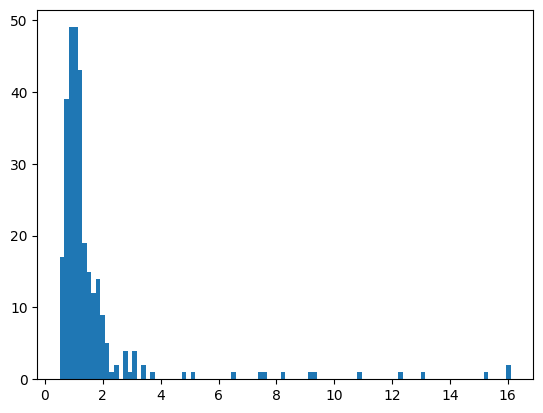

In [9]:
_ = plt.hist(df.ccrmsd, bins=100)

In [10]:
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import minmax_scale

sequence_properties = ['molecular_weight', 'aromaticity', 'instability_index', 'isoelectric_point', 'gravy', 'charge_at_pH']

wasserstein_distances = {}

for column in sequence_properties:
    # filter out NaN rows for this column
    valid = df.loc[df[column].notna(), column]
    valid_ref = nat_df.loc[nat_df[column].notna(), column]

    # min/max norm the validated rows.
    try:
        normed = minmax_scale(valid)
        normed_ref = minmax_scale(valid_ref)
        # compute wasserstein
        wasserstein_distances[f"{column}_wd"] = wasserstein_distance(normed, normed_ref)
    except ValueError:
        wasserstein_distances[f"{column}_wd"] = float("inf")

total_wd = sum(wasserstein_distances.values())
avg_wd = total_wd / len(sequence_properties)

print(avg_wd)
wasserstein_distances

0.1448384240707375


{'molecular_weight_wd': 0.2500586872387965,
 'aromaticity_wd': 0.05783892665748883,
 'instability_index_wd': 0.1861832483059882,
 'isoelectric_point_wd': 0.1242272913823642,
 'gravy_wd': 0.12719526430305186,
 'charge_at_pH_wd': 0.12352712653673532}

# ProteinGenerator

In [11]:
sampdir = Path("/data/lux70/plaid/baselines/proteingenerator/100_200_300/")
df = pd.read_csv(sampdir / "designability.csv")
print(df.designable.sum() / len(df))
df.describe()

0.0


,Unnamed: 0,plddt,ccrmsd,scrmsd,cctm,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,0.841870,15.715159,3.472982,0.420356,0.862380,8.988858,21688.846412,0.037822,63.963855,5.630221,-0.159347,-11.144268
std,86.746758,0.108771,3.369976,4.676504,0.093942,0.131920,2.014334,8130.311760,0.030445,21.175184,2.096156,0.609553,10.346914
min,0.000000,0.353380,2.972114,0.469446,0.213520,0.187450,3.323046,9342.584300,0.000000,1.701000,4.169163,-1.644000,-39.067165
25%,74.750000,0.784605,13.518054,1.104983,0.345890,0.819925,7.446304,12363.445325,0.010000,46.950417,4.603626,-0.567750,-17.860590
50%,149.500000,0.857825,15.729024,1.745634,0.410530,0.911380,9.114353,22206.624200,0.035000,64.863000,4.818548,-0.163833,-10.799501
75%,224.250000,0.927249,17.989170,3.315563,0.487482,0.952647,10.251444,29340.366075,0.060000,76.489000,5.216237,0.205917,-4.953637
max,299.000000,0.992404,28.042869,37.848807,0.721220,0.984260,14.221144,36775.866100,0.130000,125.194000,11.999968,1.647333,18.782847


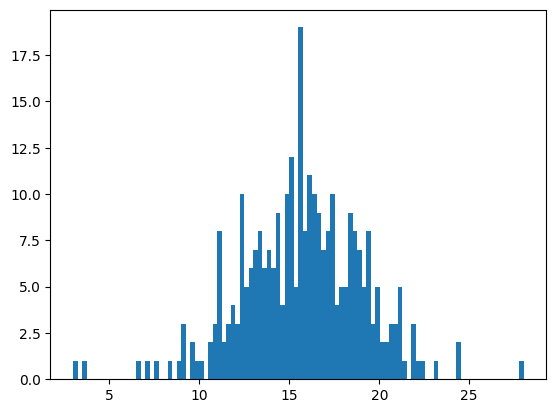

In [12]:
_ = plt.hist(df.ccrmsd, bins=100)

In [13]:
# from scipy.stats import wasserstein_distance

# for prop in sequence_properties:
#     nat_dist = nat_df[prop].values
#     sampled_dist = df[prop].values
#     print(prop, wasserstein_distance(nat_dist, sampled_dist))

In [14]:
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import minmax_scale

sequence_properties = ['molecular_weight', 'aromaticity', 'instability_index', 'isoelectric_point', 'gravy', 'charge_at_pH']

wasserstein_distances = {}

for column in sequence_properties:
    # filter out NaN rows for this column
    valid = df.loc[df[column].notna(), column]
    valid_ref = nat_df.loc[nat_df[column].notna(), column]

    # min/max norm the validated rows.
    try:
        normed = minmax_scale(valid)
        normed_ref = minmax_scale(valid_ref)
        # compute wasserstein
        wasserstein_distances[f"{column}_wd"] = wasserstein_distance(normed, normed_ref)
    except ValueError:
        wasserstein_distances[f"{column}_wd"] = float("inf")

total_wd = sum(wasserstein_distances.values())
avg_wd = total_wd / len(sequence_properties)

print(avg_wd)
wasserstein_distances

0.15252965505788832


{'molecular_weight_wd': 0.22089313291579124,
 'aromaticity_wd': 0.08914292697500449,
 'instability_index_wd': 0.2261698059432619,
 'isoelectric_point_wd': 0.20969769979290903,
 'gravy_wd': 0.07893209933844836,
 'charge_at_pH_wd': 0.09034226538191506}

# Protpardelle

In [15]:
sampdir = Path("/data/lux70/plaid/baselines/protpardelle/samples_100_200_300/")
df = pd.read_csv(sampdir / "designability.csv")
print(df.designable.sum() / len(df))
df.describe()

0.0


,Unnamed: 0,plddt,ccrmsd,scrmsd,cctm,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
count,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,1.0,13.925472,6.258490,0.519722,0.707191,10.819026,20517.074209,0.033511,27.619720,4.986207,0.114537,-10.071855
std,86.746758,0.0,2.664915,4.409539,0.140039,0.170484,1.238202,8089.016392,0.017320,10.822306,0.773812,0.343164,6.056694
min,0.000000,1.0,4.282326,0.866276,0.195940,0.188090,5.180242,8923.150400,0.000000,-11.850000,4.050028,-1.205667,-29.212283
25%,74.750000,1.0,12.499735,3.112392,0.396180,0.620387,10.075860,10928.714900,0.020000,21.145875,4.642887,-0.057250,-14.326657
50%,149.500000,1.0,13.879394,4.633996,0.529090,0.758350,10.824263,21014.332600,0.030000,27.017250,4.832673,0.128500,-9.131937
75%,224.250000,1.0,15.475880,8.444149,0.642382,0.837668,11.599490,29438.139625,0.045000,33.075000,5.089329,0.343875,-5.526687
max,299.000000,1.0,34.191007,24.255870,0.788880,0.951740,13.958786,36014.227600,0.090000,78.168000,11.271346,1.162000,3.470441


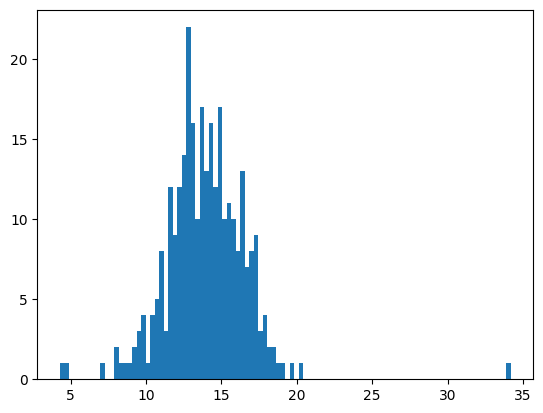

In [16]:
_ = plt.hist(df.ccrmsd, bins=100)

In [17]:
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import minmax_scale

sequence_properties = ['molecular_weight', 'aromaticity', 'instability_index', 'isoelectric_point', 'gravy', 'charge_at_pH']

wasserstein_distances = {}

for column in sequence_properties:
    # filter out NaN rows for this column
    valid = df.loc[df[column].notna(), column]
    valid_ref = nat_df.loc[nat_df[column].notna(), column]

    # min/max norm the validated rows.
    try:
        normed = minmax_scale(valid)
        normed_ref = minmax_scale(valid_ref)
        # compute wasserstein
        wasserstein_distances[f"{column}_wd"] = wasserstein_distance(normed, normed_ref)
    except ValueError:
        wasserstein_distances[f"{column}_wd"] = float("inf")

total_wd = sum(wasserstein_distances.values())
avg_wd = total_wd / len(sequence_properties)

print(avg_wd)
wasserstein_distances

0.13323261829623997


{'molecular_weight_wd': 0.2016210068597288,
 'aromaticity_wd': 0.06216675643767743,
 'instability_index_wd': 0.16095444206306173,
 'isoelectric_point_wd': 0.2375634310141772,
 'gravy_wd': 0.04382707144450583,
 'charge_at_pH_wd': 0.09326300195828884}

# PLAID

In [18]:
sampdir = Path("/data/lux70/plaid/artifacts/samples/5j007z42/100_200_300_v2")
df_dict = {}
for length in os.listdir(sampdir):
    df_dict[length] = pd.read_csv(sampdir / str(length) / "designability.csv")

df = pd.concat(list(df_dict.values()))

print(df.designable.sum() / len(df))
df.describe() 

0.3958333333333333


,Unnamed: 0,plddt,ccrmsd,scrmsd,cctm,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,63.500000,62.175661,7.601408,9.061464,0.717029,0.685908,14.582691,21802.215125,0.088442,37.042934,6.740805,-0.088751,-2.633039
std,36.997495,16.983231,7.519576,8.122065,0.269025,0.240057,4.536481,8963.561348,0.032020,11.598985,1.876071,0.410148,7.108452
min,0.000000,28.511804,0.133237,0.510090,0.232130,0.233410,3.218736,9653.784800,0.010135,7.584375,4.050028,-1.011149,-26.135306
25%,31.750000,47.992987,1.072100,2.012852,0.434648,0.455278,11.201772,10984.792625,0.064189,28.992800,5.163987,-0.320125,-6.971115
50%,63.500000,61.646083,4.730702,5.751374,0.813390,0.756965,16.374815,22259.599900,0.085000,36.537753,6.068892,-0.143497,-1.963758
75%,95.250000,76.498177,13.678748,14.290660,0.968565,0.910443,18.207616,31762.415500,0.112261,44.323057,8.706262,0.036628,2.127840
max,127.000000,93.160516,30.012793,34.637582,0.998970,0.984060,21.261403,35421.960200,0.187500,71.406000,11.477967,1.443750,14.004487


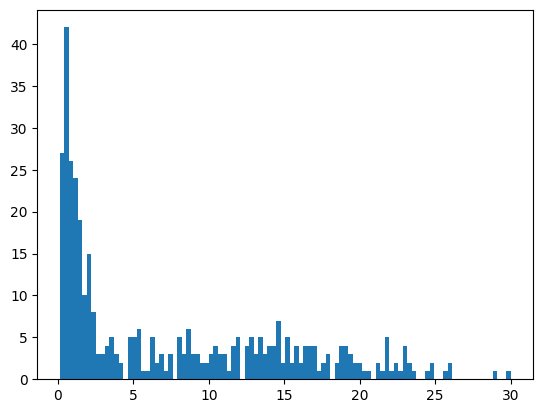

In [19]:
_ = plt.hist(df.ccrmsd, bins=100)

In [20]:
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import minmax_scale

sequence_properties = ['molecular_weight', 'aromaticity', 'instability_index', 'isoelectric_point', 'gravy', 'charge_at_pH']

wasserstein_distances = {}

for column in sequence_properties:
    # filter out NaN rows for this column
    valid = df.loc[df[column].notna(), column]
    valid_ref = nat_df.loc[nat_df[column].notna(), column]

    # min/max norm the validated rows.
    try:
        normed = minmax_scale(valid)
        normed_ref = minmax_scale(valid_ref)
        # compute wasserstein
        wasserstein_distances[f"{column}_wd"] = wasserstein_distance(normed, normed_ref)
    except ValueError:
        wasserstein_distances[f"{column}_wd"] = float("inf")

total_wd = sum(wasserstein_distances.values())
avg_wd = total_wd / len(sequence_properties)

print(avg_wd)
wasserstein_distances

0.13733965872375364


{'molecular_weight_wd': 0.25472955878830356,
 'aromaticity_wd': 0.12708473527129405,
 'instability_index_wd': 0.18572968141736335,
 'isoelectric_point_wd': 0.02678099221539159,
 'gravy_wd': 0.14807951445925882,
 'charge_at_pH_wd': 0.08163347019091058}

# Random Pfam partition

In [21]:
df = pd.read_parquet("/data/lux70/data/pfam/val.parquet")

In [22]:
df = df.sample(frac=1.0)[:300]

In [23]:
df.head()

,pfam_id,organism,sequence,GO_id,GO_term,GO_level,GO_counts,GO_idx,organism_index,organism_counts,seq_len
7131444,PF03884,9NEIS,VKCPTCQTPVIWSSESKYRPFCSHRCKLIDLGEWAEERYSVEAVED...,GO:0008270,zinc ion binding,function,101.0,229,28,136316,51
5295153,PF06110,9STRA,TVSDFATLKRMMRLFEDSQPTYLLFISGTWPQNQRMWCIYCRYREA...,,,,NaN,2219,99,249351,97
3518116,PF16898,CERFI,FITPIVKTWQGNNPKRPLRQRSFFTQPEYNEWLEIHKDDKPKWRYK...,,,,NaN,2219,1848,3104,134
8519401,PF00172,PENBI,PGCALCRARRLLCDRRRPSCSQCLRAKRECSGYQDLQAL,GO:0000981,"DNA-binding transcription factor activity, RNA...",function,2.0,76,1630,7660,39
2234502,PF01925,TETTS,KKLLLLIVVFFSVQMLVFIRGGKGLKSFVGITTCSISYWITNAGIL...,GO:0016020,membrane,component,541.0,64,266,20706,203


In [24]:
from plaid.utils import calculate_df_protein_property_mp
df = calculate_df_protein_property_mp(df, sequence_col="sequence")

In [25]:
df

,pfam_id,organism,sequence,GO_id,GO_term,GO_level,GO_counts,GO_idx,organism_index,organism_counts,seq_len,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
7131444,PF03884,9NEIS,VKCPTCQTPVIWSSESKYRPFCSHRCKLIDLGEWAEERYSVEAVED...,GO:0008270,zinc ion binding,function,101.0,229,28,136316,51,5894.5166,0.098039,34.309804,4.749489,-0.586275,-4.198940
5295153,PF06110,9STRA,TVSDFATLKRMMRLFEDSQPTYLLFISGTWPQNQRMWCIYCRYREA...,,,,NaN,2219,99,249351,97,11586.3442,0.164948,33.571134,8.596424,-0.185567,1.650706
3518116,PF16898,CERFI,FITPIVKTWQGNNPKRPLRQRSFFTQPEYNEWLEIHKDDKPKWRYK...,,,,NaN,2219,1848,3104,134,15885.6796,0.156716,20.288806,8.076422,-0.792537,1.036396
8519401,PF00172,PENBI,PGCALCRARRLLCDRRRPSCSQCLRAKRECSGYQDLQAL,GO:0000981,"DNA-binding transcription factor activity, RNA...",function,2.0,76,1630,7660,39,4454.2023,0.025641,118.674359,9.500915,-0.605128,5.902097
2234502,PF01925,TETTS,KKLLLLIVVFFSVQMLVFIRGGKGLKSFVGITTCSISYWITNAGIL...,GO:0016020,membrane,component,541.0,64,266,20706,203,22245.4128,0.142857,14.331034,9.543916,1.000000,7.737826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612149,PF00083,9EURO,TTCLLAVSAFNYGFSDQAFASCQAMDSFERQFGVYHPSTGKYKVKP...,GO:0022857,transmembrane transporter activity,function,25.0,34,8,500212,456,50429.0654,0.120614,27.696491,9.114363,0.241228,7.912369
7127592,PF07873,9THEO,HDISLEGRKKVTVTGVEDVQGFSDDNITLSTTLGTLLIKGKNMHIT...,,,,NaN,2219,1597,27761,66,7254.1224,0.045455,28.366667,4.850947,-0.225758,-4.053476
4762020,PF00152,TRIMA,TEALRLQYRYLDLRSSQMQYNLRLRSQTVMKMREYLCNLHGFVDVE...,GO:0006418,tRNA aminoacylation for protein translation,process,10.0,56,2379,12696,443,50187.1966,0.088036,45.521242,6.158698,-0.247404,-4.624560
3176400,PF13676,9ACTN,DHVVELLGLPPGRQAGFMDRMLDGGQVWTDDLAFAAGHCQVFIPLI...,GO:0007165,signal transduction,process,34.0,8,31,3774426,120,13420.1610,0.100000,60.510000,6.923182,-0.260833,-0.068373


In [26]:
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import minmax_scale

sequence_properties = ['molecular_weight', 'aromaticity', 'instability_index', 'isoelectric_point', 'gravy', 'charge_at_pH']

wasserstein_distances = {}

for column in sequence_properties:
    # filter out NaN rows for this column
    valid = df.loc[df[column].notna(), column]
    valid_ref = nat_df.loc[nat_df[column].notna(), column]

    # min/max norm the validated rows.
    try:
        normed = minmax_scale(valid)
        normed_ref = minmax_scale(valid_ref)
        # compute wasserstein
        wasserstein_distances[f"{column}_wd"] = wasserstein_distance(normed, normed_ref)
    except ValueError:
        wasserstein_distances[f"{column}_wd"] = float("inf")

total_wd = sum(wasserstein_distances.values())
avg_wd = total_wd / len(sequence_properties)

print(avg_wd)
wasserstein_distances

0.07112326330581605


{'molecular_weight_wd': 0.015536489068495633,
 'aromaticity_wd': 0.14456048701116148,
 'instability_index_wd': 0.1415111453758757,
 'isoelectric_point_wd': 0.02153643650989587,
 'gravy_wd': 0.08935211430779699,
 'charge_at_pH_wd': 0.014242907561670536}